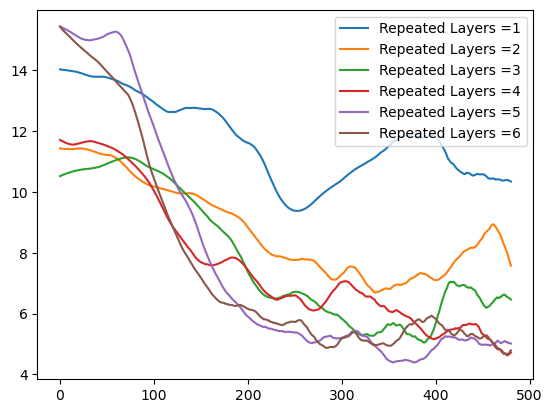

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

arrays = [np.load(f) for f in sorted(os.listdir()) if f.endswith('.npy')]
  
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    np_arr = np.array(arr)
    cumsum = np_arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array((cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE))


    
for i, data in enumerate(arrays):
    plt.plot(rolling_average(data,20), label=f'Repeated Layers ={i+1}')
    plt.legend()




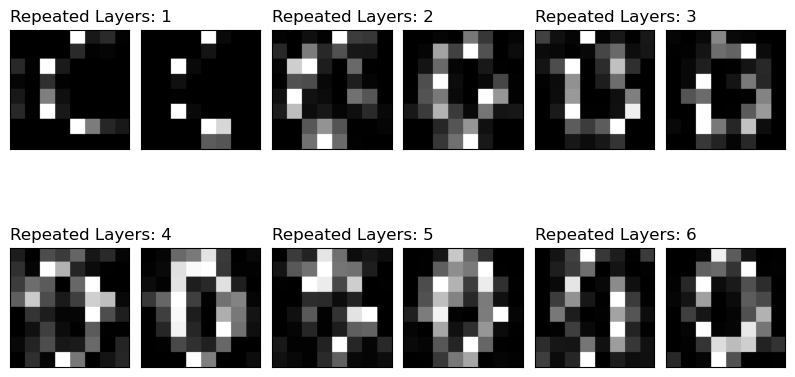

In [22]:
from matplotlib import gridspec
from PIL import Image
import numpy as np

folder_path = os.getcwd()
image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith("0.png") or f.lower().endswith("1.png")]) #only want 2 images per layer so not crowded
loaded_images = [np.array(Image.open(os.path.join(folder_path, f)).convert("L")) for f in image_files]

# Create 5x2 grid
fig = plt.figure(figsize=(10, 5))
outer = gridspec.GridSpec(2, 6, wspace=0.1, hspace=0.3)

for i, img_array in enumerate(loaded_images[:12]):  #6 layers 2 images per layer
    ax = plt.Subplot(fig, outer[i])
    ax.imshow(img_array, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if i % 2 == 0:
        ax.set_title(f'Repeated Layers: {int((i/2)+1)}', loc='left')
    fig.add_subplot(ax)

plt.show()


